# Linear Regression with TensorFlow

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
emissions = pd.read_csv('../Datasets/CO2EMISSIONS/FuelConsumptionCo2.csv')
emissions.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
ENGINESIZE = emissions['ENGINESIZE']
CO2EMISSIONS = emissions['CO2EMISSIONS']

train_X = np.array(ENGINESIZE)
train_Y = np.array(CO2EMISSIONS)
number = train_X.shape[0]

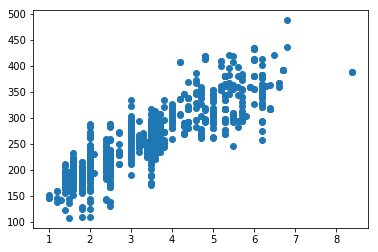

In [4]:
plt.scatter(train_X, train_Y)
plt.show()

In [5]:
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

In [6]:
predictions = tf.add(tf.multiply(X, W), b)

In [7]:
loss_function = tf.reduce_sum(tf.pow(predictions - Y, 2))/(2 * number)

In [8]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(loss_function)

In [9]:
init = tf.global_variables_initializer()

Start Training...
Epoch: 0100 Loss = 1139.10852 Weight = 63.144855 Bias = 31.647346
Epoch: 0200 Loss = 973.91211 Weight = 59.949665 Bias = 44.089058
Epoch: 0300 Loss = 849.69495 Weight = 57.178802 Bias = 54.877728
Epoch: 0400 Loss = 756.27802 Weight = 54.775845 Bias = 64.23461
Epoch: 0500 Loss = 686.03540 Weight = 52.691944 Bias = 72.34834
Epoch: 0600 Loss = 633.21497 Weight = 50.88486 Bias = 79.38475
Epoch: 0700 Loss = 593.50104 Weight = 49.317856 Bias = 85.486046
Epoch: 0800 Loss = 563.61975 Weight = 47.958443 Bias = 90.78071
Epoch: 0900 Loss = 541.17523 Weight = 46.780212 Bias = 95.36736
Epoch: 1000 Loss = 524.27625 Weight = 45.757576 Bias = 99.350555

Optimization Finished!

Final Training Loss= 524.27625 Weight = 45.757576 Bias = 99.350555 



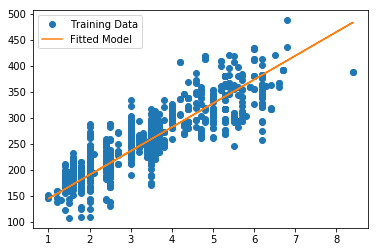

In [10]:
with tf.Session() as sess:
    sess.run(init)
    
    print("Start Training...")
    for epoch in range(1000):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            
        if (epoch+1) % 100 == 0:
            c = sess.run(loss_function, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "Loss =", "{:.5f}".format(c), "Weight =", sess.run(W), "Bias =", sess.run(b))

    print("\nOptimization Finished!\n")
    training_loss = sess.run(loss_function, feed_dict={X: train_X, Y: train_Y})
    print("Final Training Loss=", training_loss, "Weight =", sess.run(W), "Bias =", sess.run(b), '\n')

    plt.plot(train_X, train_Y, 'o', label='Training Data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted Model')
    plt.legend()
    plt.show()

# Visualizing the Graph
<img src="./Images/02_Linear_Regression_with_TF_Graph.jpg">